#                          EMAIL SPAM CLASSIFICATION

Email spam, also known as junk email, refers to unsolicited email messages, usually sent in bulk to a large list of recipients. Spam can be sent by real humans, but more often, it is sent by a botnet, which is a network of computers (bots or spambots) infected with malware and controlled by a single attacking party (bot herder). Apart from email, spam can also be distributed via text messages or social media.

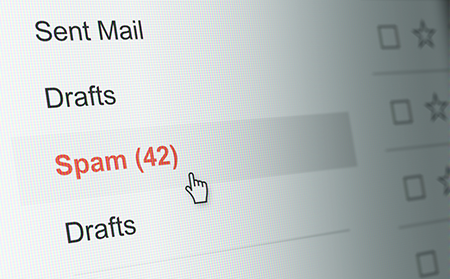

## AIM
The aim of this project is to find the best model to predict wheather the email is spam or ham.

 IMPORTING LIBRARIES

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

 READING AND CLEANING DATA

In [2]:
data=pd.read_csv('mail_data.csv')

In [3]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# checking unique values for Category

In [4]:
data.Category.unique()

array(['ham', 'spam'], dtype=object)

In [5]:
# First 5 rows

In [6]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Number of rows and columns

In [8]:
data.shape

(5572, 2)

In [9]:
# checking datatype

In [10]:
data.dtypes

Category    object
Message     object
dtype: object

In [11]:
# checking null value

In [12]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
# Label Encoding (spam-0 ham-1)

In [14]:
data.loc[data['Category'] == 'spam','Category',]= 0
data.loc[data['Category'] == 'ham','Category',]= 1

PLOT

In [ ]:
# Count plot for spam and ham mails

1    4825
0     747
Name: Category, dtype: int64


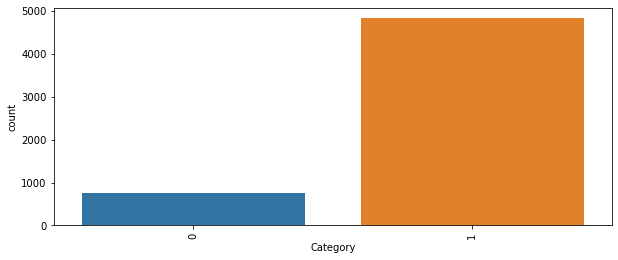

In [63]:
print(data['Category'].value_counts())
plt.figure(figsize=(10,4))
sns.countplot(x=data['Category'])
plt.xticks(rotation=90)
plt.show()

FEATURE ENGINEERING

In [15]:
# Seperating the data as X and Y (X-Message,Y-Category)

In [16]:
X = data['Message']
Y = data['Category']

In [17]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [18]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [20]:
# Splitting data into Trainiing data and Testing data

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [22]:
# checking the number of rows and columns in X, X_train and X_test

In [20]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [24]:
# Transforming the text data into feature vectors

In [21]:
feature_extraction = CountVectorizer(min_df=1,stop_words='english',lowercase='True')
x_train_extraction = feature_extraction.fit_transform(X_train)
x_test_extraction = feature_extraction.transform(X_test)

In [22]:
# converting the datatype of Y_train and Y_test into integer

In [23]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [24]:
Y_train.dtype

dtype('int32')

In [29]:
Y_test.dtype

dtype('int32')

### Machine Learning models

The following 3 models are used:

    1. Logistic Regression 
    
    2. Naive Bayes 
    
    3. Random Forest Classifier

## Logistic Regression

Training The Model

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train_extraction,Y_train)

LogisticRegression()

 Evaluating The Trained Model

In [32]:
# prediction on training data

In [27]:
Prediction_train = model.predict(x_train_extraction)
Accuracy_train = accuracy_score(Y_train,Prediction_train)

In [28]:
print('Accuracy on training data:',Accuracy_train)

Accuracy on training data: 0.9946152120260264


In [35]:
# prediction on test data

In [29]:
Prediction_test = model.predict(x_test_extraction)
Accuracy_test = accuracy_score(Y_test,Prediction_test)

In [30]:
print('Accuracy on test data:',Accuracy_test)

Accuracy on test data: 0.979372197309417


Plotting confusion matrix

In [37]:
performance = confusion_matrix(Y_test,Prediction_test)

In [40]:
performance

array([[132,  23],
       [  0, 960]], dtype=int64)

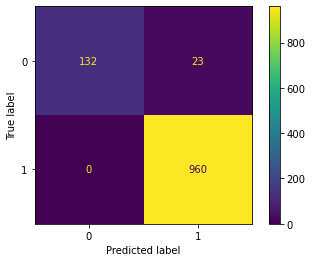

In [43]:
plot_confusion_matrix(model,x_test_extraction,Y_test)
plt.show()

Classification Report

In [46]:
performance_report = classification_report(Y_test,Prediction_test)
performance_report

'              precision    recall  f1-score   support\n\n           0       1.00      0.85      0.92       155\n           1       0.98      1.00      0.99       960\n\n    accuracy                           0.98      1115\n   macro avg       0.99      0.93      0.95      1115\nweighted avg       0.98      0.98      0.98      1115\n'

Predicting a mail is spam or not

In [31]:
mail = ["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

In [32]:
# converting mail into vector feature

In [33]:
mail_extraction = feature_extraction.transform(mail)

In [34]:
# predicting

In [35]:
prediction=model.predict(mail_extraction)

In [44]:
# print prediction  (spam-0,ham-1)

In [36]:
print(prediction)

[0]


This is a spam mail.✔

## Naive Bayes Model

Training the model

In [105]:
model_2=MultinomialNB()

In [106]:
model_2.fit(x_train_extraction,Y_train)

MultinomialNB()

 Evaluating The Trained Model

In [49]:
# prediction on training data

In [107]:
Prediction_train_2 = model_2.predict(x_train_extraction)
Accuracy_train_2 = accuracy_score(Y_train,Prediction_train_2)

In [108]:
print('Accuracy on train data:',Accuracy_train_2)

Accuracy on train data: 0.9939421135292797


In [51]:
# prediction on test data

In [109]:
Prediction_test_2 = model_2.predict(x_test_extraction)
Accuracy_test_2 = accuracy_score(Y_test,Prediction_test_2)

In [110]:
print('Accuracy on test data:',Accuracy_test_2)

Accuracy on test data: 0.9883408071748879


plotting confusion matrix

In [54]:
performance = confusion_matrix(Y_test,Prediction_test_2)

In [55]:
performance

array([[145,  10],
       [  3, 957]], dtype=int64)

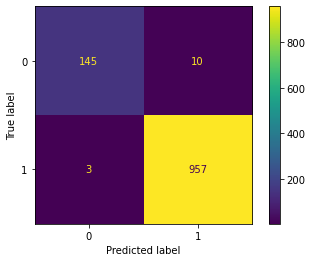

In [56]:
plot_confusion_matrix(model,x_test_extraction,Y_test)
plt.show()

Classification Report

In [58]:
performance_report_2 = classification_report(Y_test,Prediction_test_2)
performance_report_2

'              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96       155\n           1       0.99      1.00      0.99       960\n\n    accuracy                           0.99      1115\n   macro avg       0.98      0.97      0.98      1115\nweighted avg       0.99      0.99      0.99      1115\n'

Predicting a mail is spam or not

In [53]:
mail_2=["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

In [ ]:
# converting mail into vector feature

In [55]:
mail_extraction_2 = feature_extraction.transform(mail_2)

In [ ]:
# predicting

In [56]:
prediction_2=model.predict(mail_extraction_2)

In [ ]:
# print prediction  (spam-0,ham-1)

In [57]:
print(prediction_2)

[1]


This is a ham mail.✔

## Random Forest Classifier

Training the model

In [93]:
model_3=RandomForestClassifier()

In [94]:
model_3.fit(x_train_extraction,Y_train)

RandomForestClassifier()

Evaluating The Trained Model

In [ ]:
# prediction on training data

In [95]:
Prediction_train_3 = model_3.predict(x_train_extraction)
Accuracy_train_3 = accuracy_score(Y_train,Prediction_train_3)

In [96]:
print('Accuracy on train data:',Accuracy_train_3)

Accuracy on train data: 1.0


In [ ]:
# prediction on test data

In [99]:
Prediction_test_3 = model_3.predict(x_test_extraction)
Accuracy_test_3 = accuracy_score(Y_test,Prediction_test_3)

In [100]:
print('Accuracy on test data:',Accuracy_test_3)

Accuracy on test data: 0.9766816143497757


plotting confusion matrix

In [101]:
performance = confusion_matrix(Y_test,Prediction_test_3)

In [102]:
performance

array([[129,  26],
       [  0, 960]], dtype=int64)

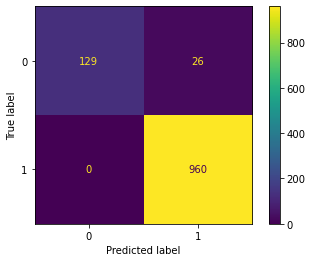

In [104]:
plot_confusion_matrix(model_3,x_test_extraction,Y_test)
plt.show()

Classification Report

In [111]:
performance_report_3 = classification_report(Y_test,Prediction_test_3)
performance_report_3

'              precision    recall  f1-score   support\n\n           0       1.00      0.83      0.91       155\n           1       0.97      1.00      0.99       960\n\n    accuracy                           0.98      1115\n   macro avg       0.99      0.92      0.95      1115\nweighted avg       0.98      0.98      0.98      1115\n'

Predicting a mail is spam or not

In [112]:
mail_3=["I HAVE A DATE ON SUNDAY WITH WILL!!"]

In [ ]:
# converting mail into vector feature

In [113]:
mail_extraction_3 = feature_extraction.transform(mail_3)

In [ ]:
# Predicting

In [114]:
prediction_3=model_3.predict(mail_extraction_3)

In [ ]:
# print prediction  (spam-0,ham-1)

In [115]:
print(prediction_3)

[1]


This is a ham mail.✔

# Conclusion

Accuracy for Logistic Regression model : 0.979372197309417

Accuracy for Naive Bayes model         : 0.9883408071748879

Accuracy for Random Forest Classification model       : 0.9766816143497757 


The model with the best accuracy is Naive Bayes.